1. 이터레이터(iterator)
    - 데이터를 차례대로 꺼낼 수 있도록 해주는 객체
    - for i in range(100) : 0부터 99까지의 값을 차례대로 하나씩 꺼낼 수 있는 이터레이터 객체가 만들어짐
2. 반복 가능한 객체(iterable) : list, dict, set, str, bytes, tuple, range
    - for in 반복문, Range, enumerate 에서 iterable한 타입과 iterable한 타입을 확인하는 방법이 있습니다.
   

In [17]:
dir([1,2,3]) #'__iter__' : 이터레이터 객체가 있는 걸 의미

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [21]:
it = [1,2,3].__iter__()

In [22]:
# 이터레이터는 next를 이용해서 데이터를 꺼낼 수 있음
it.__next__()

1

In [23]:
it.__next__()

2

In [24]:
it.__next__()

3

In [25]:
it = range(3).__iter__()
it.__next__()

0

In [ ]:
# iterator 동작 원리
# for i in range(3):
#     print(i)
# __iter__() -> __next__() -> 0
#            -> __next__() -> 1
#            -> __next__() -> 2    

In [9]:
# iterator 직접 코딩
class Counter:
    def __init__(self, stop): # 0번, 1번, 2번 붕어빵 만드는게 목표 
        self.cur = 0 # 현재 붕어빵 번호
        self.stop = stop # 붕어빵 굽기 종료 시점
    def __iter__(self):
        return self # 현재 자기자신 반환
    def __next__(self):
        if self.cur < self.stop: # 현재 붕어빵 번호가 붕어빵 굽기 종료 번호보다 작으면
            r = self.cur
            self.cur += 1
            return r
        else:
            raise StopIteration
            
# 붕어빵기계(클래스), 붕어빵(객체)
for i in Counter(3): # 붕어빵기계(붕어빵3마리)
    print(i) 

0
1
2


In [10]:
a,b,c = Counter(3)
a

0

In [12]:
a,_,c = Counter(3)
c

2

2. 제너레이터 : 이터레이터를 생성해주는 함수
    - yield 키워드 사용하여 생성.

In [14]:
def num_gen(): # 제너레이터
    yield 1
    yield 2
    yield 3
    
for i in num_gen():
    print(i) # 1 2 3 출력

1
2
3


In [15]:
# 변수 = next(제너레이터 객체)
g = num_gen()
next(g)

1

In [16]:
next(g)

2

In [17]:
next(g)

3

In [32]:
def myGen():
    i = 0
    while True:
        i += 1
        yield i

In [33]:
for i in myGen():
    print(i)
    if i > 5:
        break

1
2
3
4
5
6


## keras_도형이미지 분류 based CNN
Convolution layer : 필터로 특성을 추출
   - Conv2D(32[필터의 개수], (5,5)[필터(커널)의 크기], padding = "SAME" or "valid" [이미지 사이드 처리 선택, same:이미지크기 유지, valid:크기 축소됨], input_shape=(64,64,1) [입력이미지 크기], activation="relu" or "sigmoid"...)  
   - 필터: 가중치

### CNN을 만드는 과정
1. 문제 정의
    - 다중 분류 문제.
    - 입력 : 도형이미지, 출력: 각 도형 확률
2. 데이터 수집(데이터 부족 → 데이터 생성)
    - 케라스 : ImageDataGenerator(이미지 데이터를 생성할 수 있는 기능이 있는 클래스)를 사용해서 데이터 증식, 이미지파일 학습
3. 모델 생성
    1. conv layer:입력(24*24), 채널(3), 필터(3*3), 필터개수(32), 활성화(relu)
    2. pooling:크기(2*2)
    3. flatten
    4. dense : 출력(128), 활성화(relu)
    5. dense : 출력(3), 활성화(softmax)
4. 학습
5. 평가

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import *
from keras.layers.convolutional import *
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


[참고 사이트](https://keras.io/preprocessing/image/#imagedatagenerator-methods)

In [2]:
# flow_from_directory : 이미지의 크기를 동일하게 지정해주기 위해 쓰는 함수
train_datagen = ImageDataGenerator(rescale=1./255) # 픽셀 값을 0~1 범위로 변환
test_datagen = ImageDataGenerator(rescale=1./255) 

In [3]:
# 이미지끼리 클래스별로 나누기
train_gen = train_datagen.flow_from_directory(
    "./res/handwriting_shape/train",
    target_size=(24,24),
    class_mode="categorical",
    batch_size=3
)

test_gen = test_datagen.flow_from_directory(
    "./res/handwriting_shape/test",
    target_size=(24,24),
    class_mode="categorical",
    batch_size=3
)

Found 45 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [4]:
type(train_gen) # 제너레이터

keras_preprocessing.image.directory_iterator.DirectoryIterator

In [5]:
for x,y in train_gen:
    print(x)
    print("="*50)
    print(y)
    print("="*50)
    print(x.shape)
    print("="*50)
    print(y.shape)
    break

[[[[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  ...

  [[1.         1.         1.        ]
   [1.         1.         1.        ]
   [1.         1.         1.        ]
   ...
   [0.92549026 0.92549026 0.92549026]
   [1.         1.         1.        ]
   [1.         1.         1.        ]]

  [[1.         1.         1.        ]
   [1. 

In [6]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(24,24,3), 
                 padding='valid'))
# padding default=valid
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
# 1차원 데이터는 MaxPool1D 쓰지만, 1차원 데이터를 다루는 경우는 거의 없고 주로 2D를 씀
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(3, activation='softmax'))
model.summary()

W0820 13:27:30.665190 22708 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0820 13:27:30.919540 22708 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0820 13:27:30.922533 22708 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0820 13:27:30.948434 22708 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 22, 22, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               819328    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 387       
Total params: 839,107
Trainable params: 839,107
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

W0820 13:27:34.171814 22708 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0820 13:27:34.191783 22708 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [8]:
# fit : 케라스 모델 학습 함수
# fit_generator : 제너레이터로 생성된 데이터를 학습시킬 떄 쓰는 함수
model.fit_generator(train_gen,
                    steps_per_epoch=15, # 1에폭:45개, 배치:3이므로 45/3=15
                    epochs=100,
                    validation_data=test_gen,
                    validation_steps=5)

W0820 13:27:37.871921 22708 deprecation.py:323] From C:\Users\user\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0820 13:27:37.976641 22708 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
15/15 [==============================] - 1s 59ms/step - loss: 1.1732 - acc: 0.5556 - val_loss: 0.7696 - val_acc: 0.6667
Epoch 2/100
15/15 [==============================] - 0s 17ms/step - loss: 0.4663 - acc: 0.7333 - val_loss: 0.2352 - val_acc: 1.0000
Epoch 3/100
15/15 [==============================] - 0s 16ms/step - loss: 0.1587 - acc: 0.9556 - val_loss: 0.1503 - val_acc: 0.9333
Epoch 4/100
15/15 [==============================] - 0s 16ms/step - loss: 0.0218 - acc: 1.0000 - val_loss: 0.0810 - val_acc: 0.9333
Epoch 5/100
15/15 [==============================] - 0s 16ms/step - loss: 0.0068 - acc: 1.0000 - val_loss: 0.0773 - val_acc: 0.9333
Epoch 6/100
15/15 [==============================] - 0s 17ms/step - loss: 9.6453e-04 - acc: 1.0000 - val_loss: 0.0427 - val_acc: 1.0000
Epoch 7/100
15/15 [==============================] - 0s 17ms/step - loss: 6.1449e-04 - acc: 1.0000 - val_loss: 0.0447 - val_acc: 1.0000
Epoch 8/100
15/15 [==============================] - 0s 17ms/step - 

15/15 [==============================] - 0s 18ms/step - loss: 3.4703e-07 - acc: 1.0000 - val_loss: 0.0612 - val_acc: 1.0000
Epoch 62/100
15/15 [==============================] - 0s 16ms/step - loss: 3.4571e-07 - acc: 1.0000 - val_loss: 0.0610 - val_acc: 1.0000
Epoch 63/100
15/15 [==============================] - 0s 16ms/step - loss: 3.3908e-07 - acc: 1.0000 - val_loss: 0.0617 - val_acc: 1.0000
Epoch 64/100
15/15 [==============================] - 0s 16ms/step - loss: 3.3114e-07 - acc: 1.0000 - val_loss: 0.0609 - val_acc: 1.0000
Epoch 65/100
15/15 [==============================] - 0s 17ms/step - loss: 3.3379e-07 - acc: 1.0000 - val_loss: 0.0615 - val_acc: 1.0000
Epoch 66/100
15/15 [==============================] - 0s 17ms/step - loss: 2.9935e-07 - acc: 1.0000 - val_loss: 0.0612 - val_acc: 1.0000
Epoch 67/100
15/15 [==============================] - 0s 17ms/step - loss: 3.0067e-07 - acc: 1.0000 - val_loss: 0.0610 - val_acc: 1.0000
Epoch 68/100
15/15 [==============================] - 

In [15]:
# 모델 평가 evaluate_generator
scores = model.evaluate_generator(test_gen, steps=5)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

acc: 100.00%


In [31]:
# 예측 결과를 클래스 벡터로 표현
output = model.predict_generator(test_gen, steps=5)
np.set_printoptions(formatter={"float": lambda x: "{0:0.3f}".format(x)})
print(test_gen.class_indices)
output

{'circle': 0, 'rectangle': 1, 'triangle': 2}


array([[1.000, 0.000, 0.000],
       [0.373, 0.536, 0.091],
       [0.000, 0.202, 0.798],
       [1.000, 0.000, 0.000],
       [0.000, 1.000, 0.000],
       [0.000, 1.000, 0.000],
       [0.000, 0.000, 1.000],
       [1.000, 0.000, 0.000],
       [0.000, 0.000, 1.000],
       [1.000, 0.000, 0.000],
       [0.000, 1.000, 0.000],
       [0.000, 0.202, 0.798],
       [0.000, 1.000, 0.000],
       [1.000, 0.000, 0.000],
       [0.000, 0.018, 0.982]], dtype=float32)

In [38]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [41]:
data_aug_gen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 15, # 15도 회전
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    zoom_range = [0.8, 2.0], # 원본 이미지의 80~120%의 크기
    fill_mode = "nearest",
    vertical_flip = True# 상하 뒤집기,
    
)

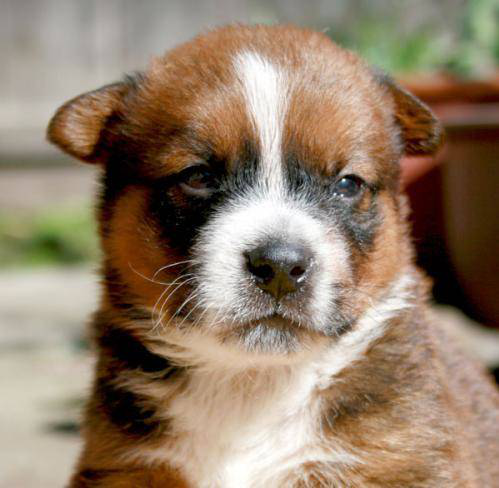

In [51]:
img = load_img("./res/dogs-vs-cats/train/train/dog.12345.jpg")
img

In [52]:
img_to_array(img)

array([[[138.000, 133.000, 130.000],
        [137.000, 132.000, 129.000],
        [137.000, 132.000, 129.000],
        ...,
        [148.000, 164.000, 135.000],
        [148.000, 164.000, 135.000],
        [148.000, 164.000, 135.000]],

       [[138.000, 133.000, 130.000],
        [138.000, 133.000, 130.000],
        [137.000, 132.000, 129.000],
        ...,
        [144.000, 163.000, 133.000],
        [144.000, 163.000, 133.000],
        [144.000, 163.000, 133.000]],

       [[139.000, 134.000, 131.000],
        [139.000, 134.000, 131.000],
        [138.000, 133.000, 130.000],
        ...,
        [140.000, 159.000, 129.000],
        [140.000, 159.000, 129.000],
        [140.000, 159.000, 129.000]],

       ...,

       [[193.000, 179.000, 166.000],
        [193.000, 179.000, 166.000],
        [193.000, 179.000, 166.000],
        ...,
        [174.000, 139.000, 119.000],
        [174.000, 139.000, 119.000],
        [174.000, 139.000, 119.000]],

       [[192.000, 178.000, 165.000],
  

In [53]:
np.shape(img)

(488, 499, 3)

In [54]:
x = img_to_array(img)
x = x.reshape((1,)+x.shape)
np.shape(x)

(1, 488, 499, 3)

In [56]:
i = 0
for data in data_aug_gen.flow(x, 
                              batch_size=1, 
                              save_to_dir="./res/dogs-vs-cats/copyimg/", 
                              save_format="png",
                              save_prefix="sample"):
    i += 1 
    if i > 50:
        break